<img src="../img/hu-logo.png" align="right" width="120">

# Missing Data

In this notebook we will review the ___missing data___ problem. 

Why should we care about missing values?
- Cause be a source of errors
- Can bias results
- Reduce efficiency of statistical methods

We will see that the the reason for missingness is of key importance:
- Missing Not at Random (MNAR)
- Missing at Random (MAR)
- Missing Completely at Random (MCAR)

In [1]:
import numpy as np
import pandas as pd

import numpy.random

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

# set some default pyplot parameters
plt.rcParams.update({
    "figure.figsize": (10, 8),
    "axes.titlesize": 20,
    "axes.labelsize": 15,
    "legend.fontsize": 15,
    "axes.grid": True,
    "axes.axisbelow": True,
    "pcolor.shading": "auto",
})

## Input

Let's generate some bivariate data, the variables are `age` and `income`.

We assume that income is a function of age (plus and intercept and a normally distributed error term that represents unobservables).

In [2]:
N = 10_000
mu_age = 40
sd_age = 8

a_income = 1500  # intercept
b_age = 30       # slope
scale_eps = 100  # scaling factor for the error term
mean_eps = 0     # mean of the error term
sd_eps = 3       # standard deviation of the error term

In [3]:
np.random.seed(501)

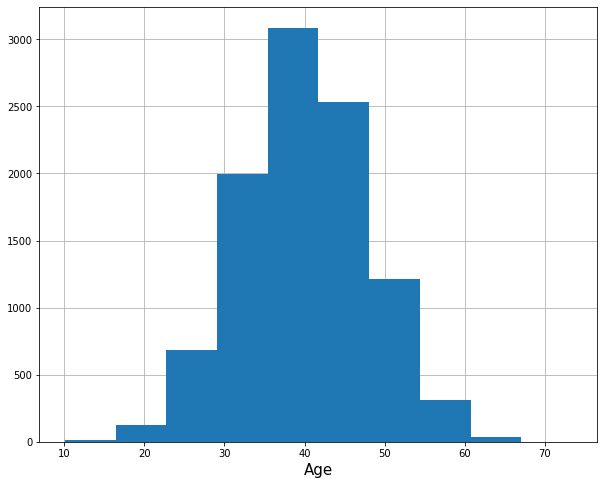

In [4]:
age = np.random.normal(40, 8, N) # X in the lecture slides
plt.hist(age)
plt.xlabel("Age")
plt.show()

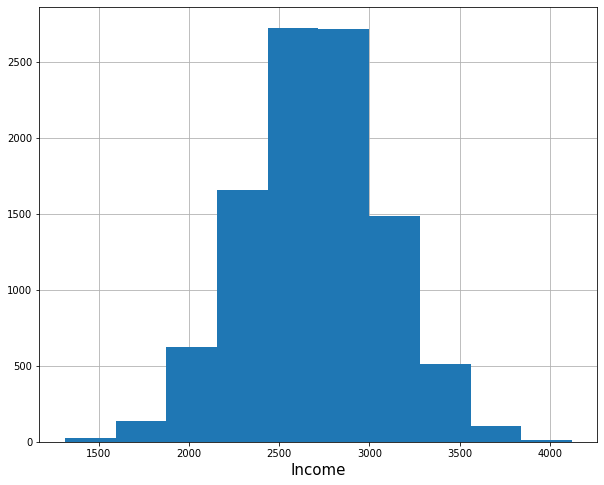

In [5]:
income = a_income + b_age*age + scale_eps*np.random.normal(mean_eps, sd_eps, N) # Y in the lecture slides
plt.hist(income)
plt.xlabel("Income")
plt.show()

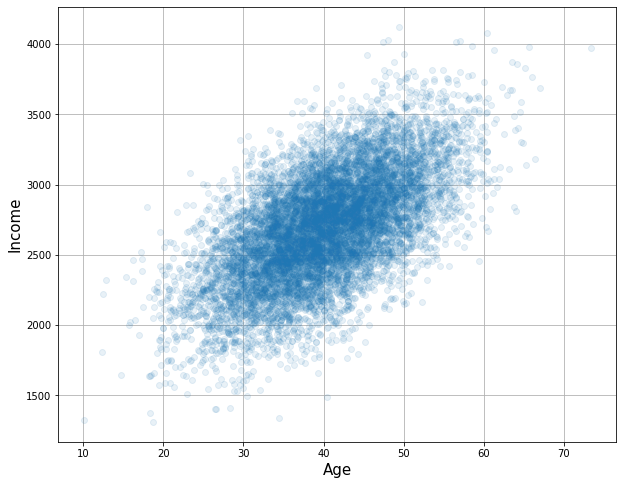

In [6]:
_ = plt.scatter(age, income, alpha=.1)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [7]:
another_variable = np.random.uniform(0, 1, N) # Z in the lecture slides

In [8]:
df = pd.DataFrame({
    "age": age,
    "income": income,
    "another_variable": another_variable,
})

## MCAR

In [9]:
mcar_df = df.copy()
mcar_df.loc[mcar_df["another_variable"]<.2, "income"] = np.NaN

### Helper function

In [10]:
def impute_lm(data, kind="mean", noise=False):

    # avoid side effects
    out = data.copy()

    # impute with mean
    if kind=="mean":
        out["income_hat"] = data["income"].mean()

    # impute with regression
    elif kind=="lm":
        model_income_age = smf.ols(
            formula='income ~ age',
            data=data[data["income"].notnull()]
        )
        result_model_income_age = model_income_age.fit()
        out["income_hat"] = result_model_income_age.predict(data)

    # add noise (sampled from residuals) to regression prediction
    if noise:
        out["income_hat"] += np.random.choice(result_model_income_age.resid, out.shape[0])

    # plot
    out["imp"] = out["income"].isnull().astype(int)
    out_obs = out[out["imp"]==0]
    plt.figure()
    # observed vaues
    plt.scatter(out_obs["age"], out_obs["income"], alpha=0.2, c="blue", label="Observed")
    # imputed (= missing) values
    if kind != "none":
        out["income_imp_reg"] = out["income"].fillna(out["income_hat"])
        out_miss = out[out["imp"]==1]
        plt.scatter(out_miss["age"], out_miss["income_imp_reg"], alpha=0.2, c="darkorange", label="Missing")
    # style plot
    plt.legend(loc="upper left")
    plt.xlabel("Age")
    plt.ylabel("Income")
    plt.xlim(5, 75)
    plt.ylim(1_000, 4_500)

### No imputation

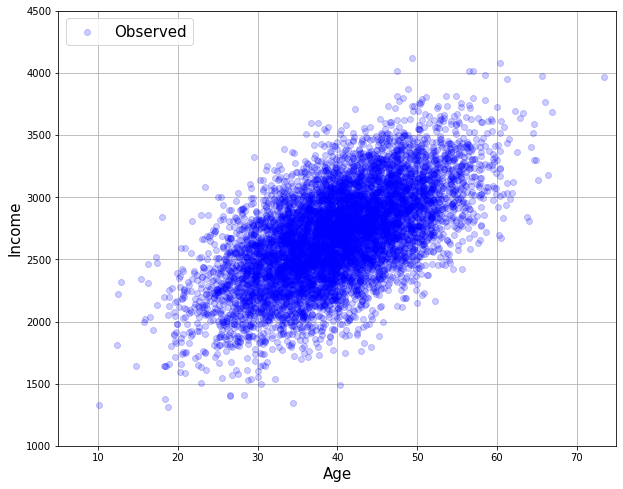

In [11]:
impute_lm(mcar_df, kind="none", noise=False)

### Impute with mean

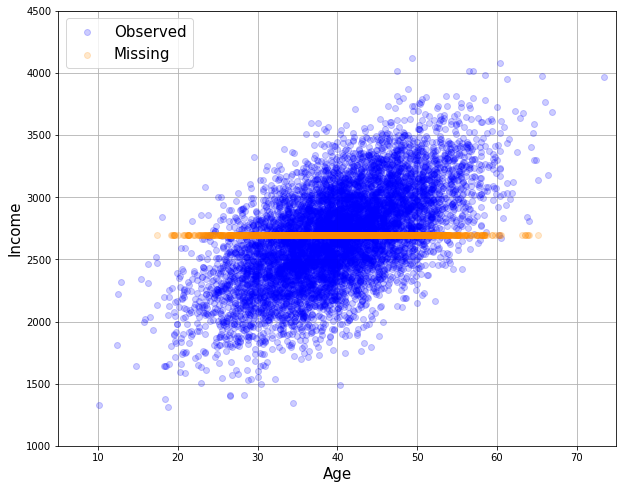

In [12]:
impute_lm(mcar_df, kind="mean", noise=False)

### Impute with regression

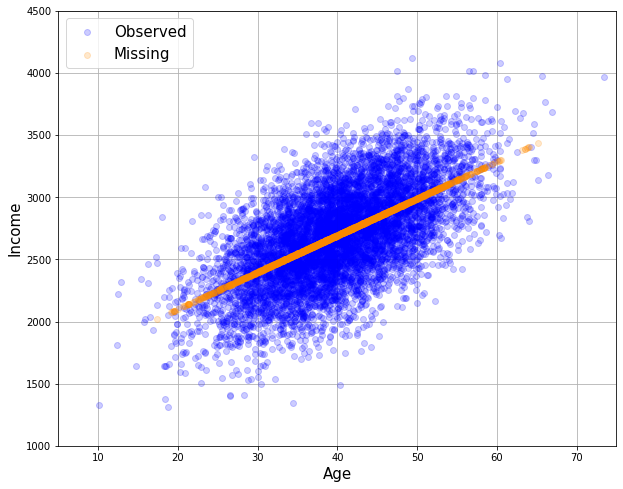

In [13]:
impute_lm(mcar_df, kind="lm", noise=False)

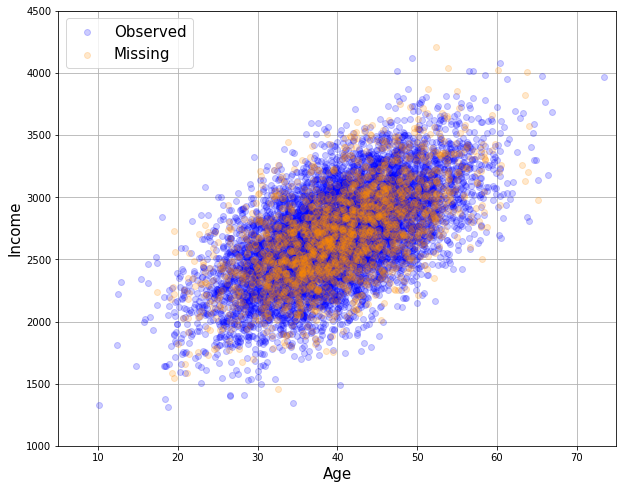

In [14]:
impute_lm(mcar_df, kind="lm", noise=True)

## MAR

In [15]:
mar_df = df.copy()
mar_df.loc[mcar_df["age"]>50, "income"] = np.NaN

### No imputation

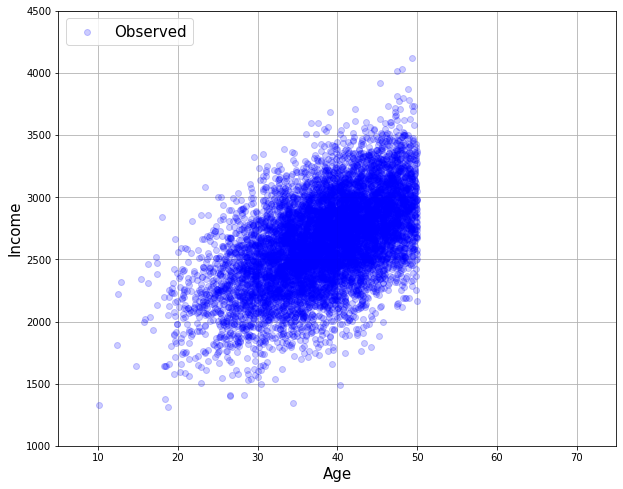

In [16]:
impute_lm(mar_df, kind="none", noise=False)

### Impute with mean

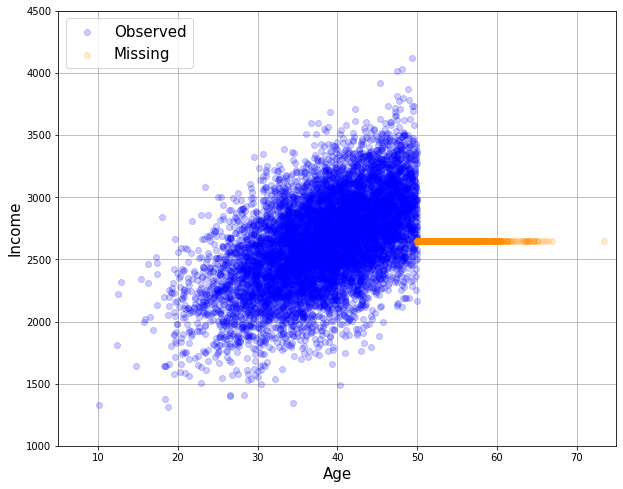

In [17]:
impute_lm(mar_df, kind="mean", noise=False)

### Impute with regression

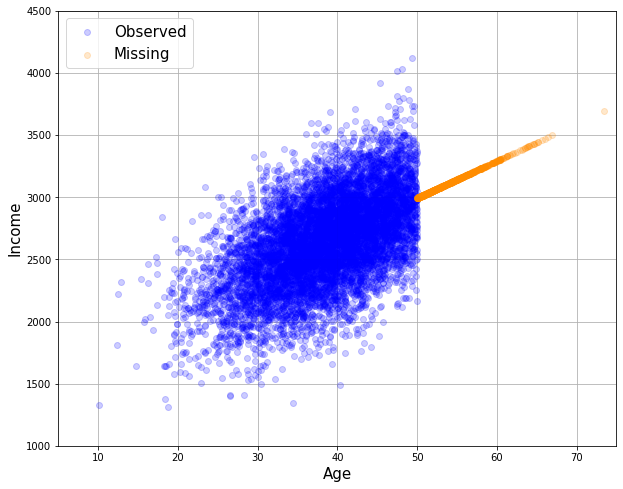

In [18]:
impute_lm(mar_df, kind="lm", noise=False)

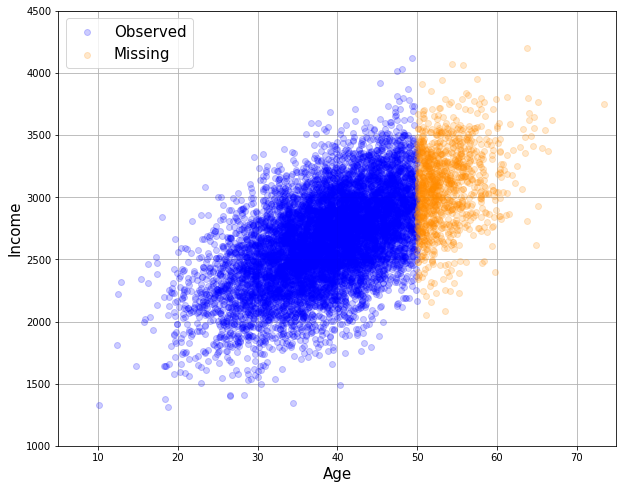

In [19]:
impute_lm(mar_df, kind="lm", noise=True)

## MNAR

In [20]:
mnar_df = df.copy()
mnar_df.loc[mnar_df["income"]<2_500, "income"] = np.NaN

### No imputation

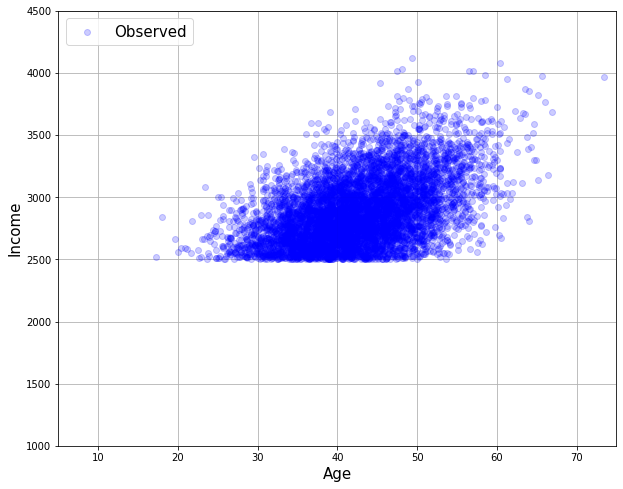

In [21]:
impute_lm(mnar_df, kind="none", noise=False)

### Impute with mean

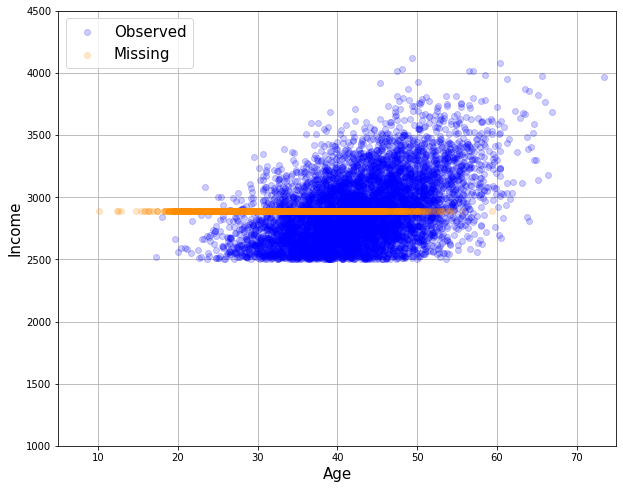

In [22]:
impute_lm(mnar_df, kind="mean", noise=False)

### Impute with regression

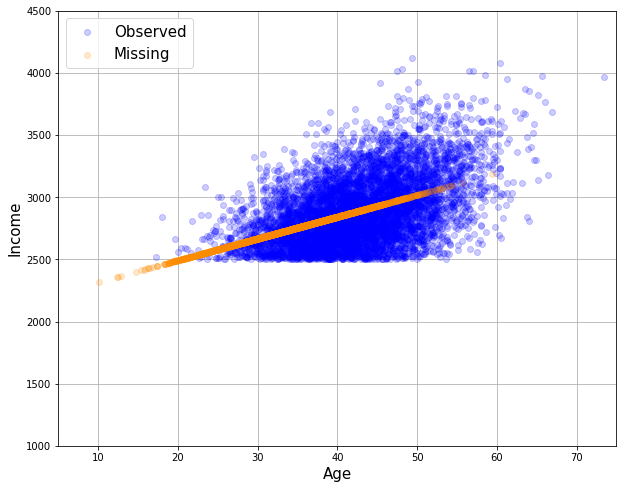

In [23]:
impute_lm(mnar_df, kind="lm", noise=False)

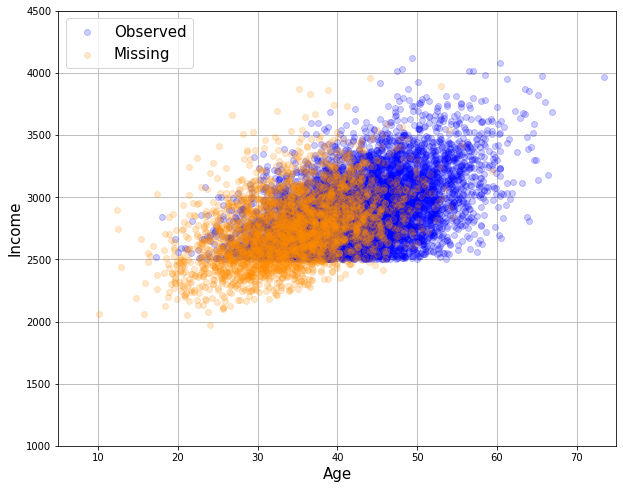

In [24]:
impute_lm(mnar_df, kind="lm", noise=True)

&mdash; <br>
Dr. Sebastian Gabel <br>
Machine Learning in Marketing &ndash; Lecture 3 <br>
2020 <br>

Based on _Schafer & Graham (2002)_